In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# PART 1: Training with Logistic Regression


## Step 1: EDA and data preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv') # reading csv file
df # output the whole .csv file using Pandas Dataframe
#print("Dataset Shape:{}".format(df.shape))
df.describe()
df.isnull().sum() #Let's see how many null values we have in out dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df = df.drop(["PassengerId","Ticket"], axis=1) # TODO write more about AXIS
df.head()
df['Age'].fillna(df["Age"].mean(),inplace=True) # filling NA values with mean values of each column
df["Embarked"].fillna(df['Embarked'].mode()[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


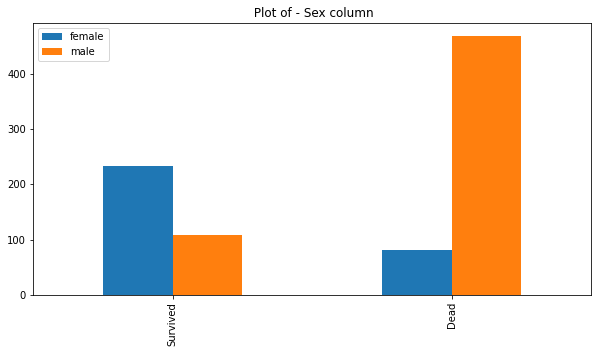

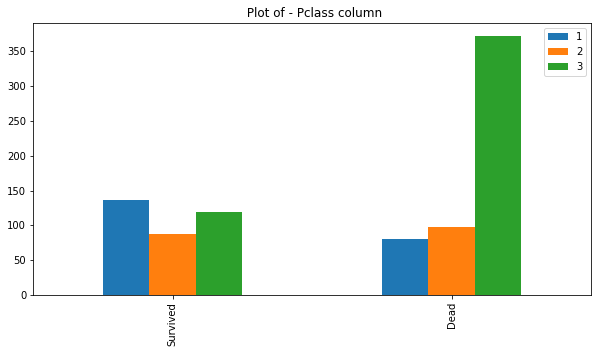

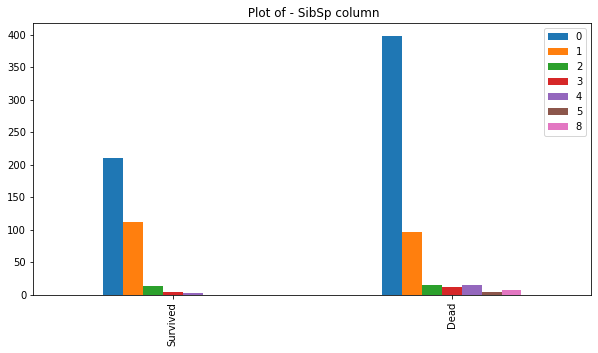

In [4]:
def column_visualization(column):
    survived = df[df['Survived']==1][column].value_counts()
    dead = df[df["Survived"]==0][column].value_counts()
    new_df = pd.DataFrame([survived,dead])
    new_df.index = ['Survived', 'Dead']
    new_df.plot(kind = 'bar',title = ' Plot of - {} column'.format(column), figsize = (10,5))
    
column_visualization("Sex")
column_visualization('Pclass')
column_visualization('SibSp')

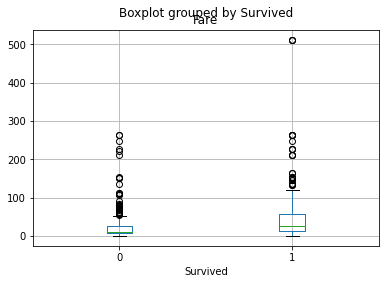

In [5]:
def box_outliers(column):
    df.boxplot(by = 'Survived', column = [column], grid = True)
box_outliers('Fare')

In [6]:
df.nlargest(10, ['Fare'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,C23 C25 C27,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,C23 C25 C27,S
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,C23 C25 C27,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,C23 C25 C27,S
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.3750,B57 B59 B63 B66,C
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,262.3750,B57 B59 B63 B66,C
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,B58 B60,C


In [7]:
df = df.drop([258,679,737])

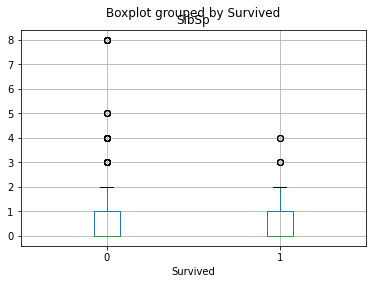

In [8]:
box_outliers('SibSp')

In [9]:
df.nlargest(10, ['SibSp'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
159,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,69.55,NaN,S
180,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,69.55,NaN,S
201,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,69.55,NaN,S
324,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,69.55,NaN,S
792,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,69.55,NaN,S
846,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,69.55,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,69.55,NaN,S
59,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,46.90,NaN,S
71,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,46.90,NaN,S
386,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,46.90,NaN,S


In [10]:
df = df.drop([159,180,201, 324,792,846,863])

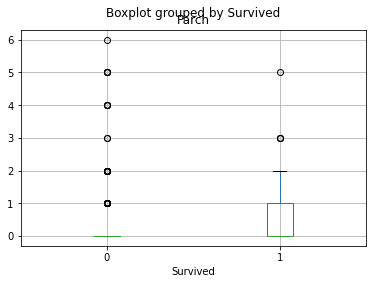

In [11]:
box_outliers('Parch')

In [12]:
df.nlargest(10, ['Parch'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,46.9000,NaN,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,31.2750,NaN,S
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,31.3875,NaN,S
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,31.2750,NaN,S
638,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,39.6875,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,NaN,Q
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,27.9000,NaN,S
360,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,27.9000,NaN,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,C23 C25 C27,S
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,NaN,S


In [13]:
df.drop([678])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C


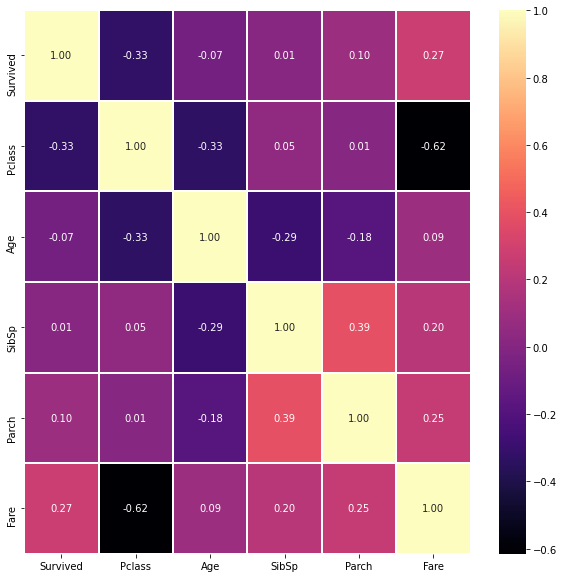

In [14]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, linewidths = 0.05, fmt = '.2f', cmap = 'magma')
plt.show()

## STEP 2: DATA PREP and Model Building

In [15]:
X = df.drop(['Cabin', 'Fare', 'Name', 'Survived'], axis = True)
y = df['Survived']

print(X.shape, y.shape)
x = pd.get_dummies(X)

(881, 6) (881,)


In [16]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range = (0,1))
x[x.columns] = x_scaler.fit_transform(x[x.columns])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state =40)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 40)
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))

0.7692307692307693


In [18]:
y_lr_pre = lr.predict(x_test)

In [19]:
new_df = pd.read_csv('/kaggle/input/titanic/test.csv')
new_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
new_x = new_df.drop(['Cabin', 'PassengerId', 'Fare', 'Name', 'Ticket'],axis = True)
new_x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [21]:
new_x.isnull().sum()
new_x['Age'].fillna(new_x['Age'].mean(),inplace=True)

In [22]:
new_x = pd.get_dummies(new_x)
new_x.head()
missing_col = set(x_train.columns)-set(new_x.columns)
for col in missing_col:
    new_x[col] = 0
    

In [23]:
new_x=new_x[x_train.columns]
new_x.shape

(418, 9)

In [24]:
new_predict = lr.predict(new_x)
print(new_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
vip = np.array(new_predict).tolist()
len(vip)

418

In [26]:
new_df.insert(2,column = 'Survived', value=vip)
new_df.head()
another_df = new_df.drop(['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
another_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [27]:
another_df.to_csv('gender_submission1.csv', index=False)
another_df.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## PART 2: GRADIENT BOOSTING ALGORITHM

In [28]:
train = pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [32]:
#replacing Zero values in Fare column with average value of this column
train['Fare'] = train['Fare'].replace(0, train['Fare'].mean())
train['Age'].fillna(train['Age'].mean(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
train.isna().sum()
train['Sex'] = train['Sex'].apply(lambda val: 1 if val == 'male' else 0)
train['Embarked'] = train['Embarked'].map({'S':0, 'C': 1, 'Q': 2})
train.head()
train['Age'] = np.log(train['Age'])
train['Fare'] = np.log(train['Fare'])

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [34]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.746366,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.514272,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,15.100000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,3.091042,1,0,1.981001,0
1,1,1,0,3.637586,1,0,4.266662,1
2,1,3,0,3.258097,0,0,2.070022,0
3,1,1,0,3.555348,1,0,3.972177,0
4,0,3,1,3.555348,0,0,2.085672,0


In [39]:
test = pd.read_csv('../input/titanic/test.csv')
test.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis = 1, inplace = True)
test['Fare'] = test['Fare'].replace(0, test['Fare'].mean())
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)
test.isna().sum()
test['Sex'] = test['Sex'].apply(lambda val: 1 if val == 'male' else 0)
test['Embarked'] = test['Embarked'].map({'S':0, 'C': 1, 'Q': 2})
test.head()
test['Age'] = np.log(test['Age'])
test['Fare'] = np.log(test['Fare'])

In [40]:
X = train.drop('Survived', axis =1)
y = train['Survived']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print('Training accuracy of Detection tree classifier is {}'.format(accuracy_score(y_train, sgb.predict(X_train))))

Training accuracy of Detection tree classifier is 0.8932584269662921


In [41]:
predictions = sgb.predict(test)

In [42]:
pred = pd.DataFrame(predictions)
sub_df = pd.read_csv('../input/titanic/gender_submission.csv')
sub_df['Survived'] = pred
sub_df.to_csv('Submission.csv', index = False)